In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
data= pd.read_csv('carseats2.csv')

In [3]:
data

,ID,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,cost
0,377,16.27,141,60,19,319,92,Good,44,11,Yes,Yes,82.000000
1,317,15.63,122,36,5,369,72,Good,35,10,Yes,Yes,51.000000
2,26,14.90,139,32,0,176,82,Good,54,11,No,No,74.269401
3,368,14.37,95,106,0,256,53,Good,52,17,Yes,No,80.934960
4,19,13.91,110,110,0,408,68,Good,46,17,No,Yes,86.605784
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,58,0.91,93,91,0,22,117,Bad,75,11,Yes,No,78.937315
396,144,0.53,122,88,7,36,159,Bad,28,17,Yes,Yes,87.036325
397,166,0.37,147,58,7,100,191,Bad,27,15,Yes,Yes,83.357072
398,107,0.16,102,33,0,217,139,Medium,70,18,No,No,85.536120


In [4]:
fig = px.scatter(data, 
                 x="Population", 
                 y="Sales", 
                 color="Urban",
                 size='Income',
                 hover_data = ['ID', 'Advertising'],
                 title = '人口與銷售額（以貨架標示；以ROI顯示大小）')

iplot(fig)
plot(fig, filename='圖1-人口與銷售額（以郊區標示；以收入顯示大小）.html')

'圖1-人口與銷售額（以郊區標示；以收入顯示大小）.html'

In [5]:
print(data['Age'].max())
print(data['Age'].min())

80
25


In [6]:
data['Age_Group']=0

for i in range(len(data)):
    if 25>= data['Age'][i] >=35:
        data['Age_Group'][i]= 1
    else:
        data['Age_Group'][i] = 2

In [7]:
data['margin_profit']=data['Price']-data['cost']
data['revenue']=data['margin_profit']*data['Sales']
data['Average_ad']= data['Advertising']/data['Population']+1
data['gross_profit']= data['revenue']-data['Advertising']
data['yeild']=data['gross_profit']/data['Average_ad']

In [8]:
data=data[data['Advertising']>0]

In [9]:
fig = px.scatter(data, 
                 x="Price", 
                 y="yeild", 
                 color="Urban",
                 size='Advertising',
                 hover_data = ['ID'],
                 title = '價格與平均淨利（以郊區標示；以廣告投入顯示大小）')

iplot(fig)
plot(fig, filename='圖2-價格與平均淨利（以郊區標示；以廣告投入顯示大小）.html')

'圖2-價格與平均淨利（以郊區標示；以廣告投入顯示大小）.html'

In [10]:
fig = px.scatter(data, 
                 x="Sales", 
                 y="yeild", 
                 color="Urban",
                 size='Advertising',
                 hover_data = ['ID'],
                 title = '銷售量與平均淨利（以郊區標示；以廣告投入顯示大小）')

iplot(fig)
plot(fig, filename='圖3-銷售量與平均淨利（以郊區標示；以廣告投入顯示大小）.html')

'圖3-銷售量與平均淨利（以郊區標示；以廣告投入顯示大小）.html'

In [11]:
fig = px.scatter(data, 
                 x="Price", 
                 y="yeild", 
                 color="US",
                 size='Advertising',
                 hover_data = ['ID'],
                 title = '價格對平均淨利（以美國標示；以廣告投入顯示大小）')

iplot(fig)
plot(fig, filename='圖4-價格對平均淨利（以美國標示；以廣告投入顯示大小）.html')

'圖4-價格對平均淨利（以美國標示；以廣告投入顯示大小）.html'

In [12]:
fig = px.scatter(data, 
                 x="Sales", 
                 y="yeild", 
                 color="US",
                 size='Advertising',
                 hover_data = ['ID'],
                 title = '銷售量對平均淨利（以美國標示；以廣告投入顯示大小）')

iplot(fig)
plot(fig, filename='圖5-銷售量對平均淨利（以美國標示；以廣告投入顯示大小）.html')

'圖5-銷售量對平均淨利（以美國標示；以廣告投入顯示大小）.html'

In [13]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [14]:
linear_reg= smf.ols('yeild~Advertising+Population+Age+Urban+US+(Urban*US)',data=data).fit()

In [15]:
print(linear_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  yeild   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     3.278
Date:                Fri, 22 Jan 2021   Prob (F-statistic):            0.00403
Time:                        19:47:17   Log-Likelihood:                -1685.0
No. Observations:                 256   AIC:                             3384.
Df Residuals:                     249   BIC:                             3409.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                361

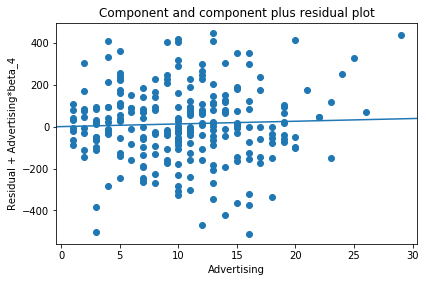

In [17]:
fig = sm.graphics.plot_ccpr(linear_reg, "Advertising")
fig.tight_layout(pad=1.0)

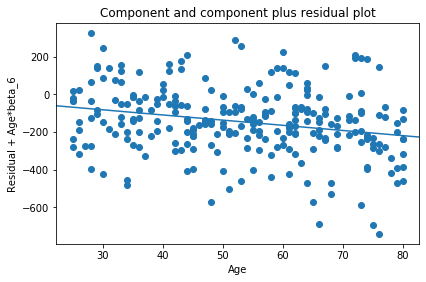

In [18]:
fig = sm.graphics.plot_ccpr(linear_reg, "Age")
fig.tight_layout(pad=1.0)

In [19]:
data['y_predict']=linear_reg.fittedvalues

In [20]:
fig = px.scatter(data, 
                 x="yeild", 
                 y="y_predict", 
                 title = '實際值與預測值')

iplot(fig)
plot(fig, filename='圖8-預測值與實際值.html')

'圖8-預測值與實際值.html'